Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

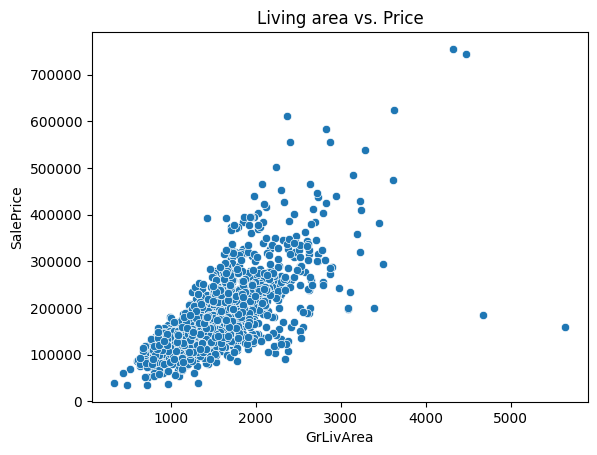

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv', header=0)
LivArea = df['GrLivArea']
Price = df['SalePrice']
print(df.columns)

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Living area vs. Price')
plt.show()

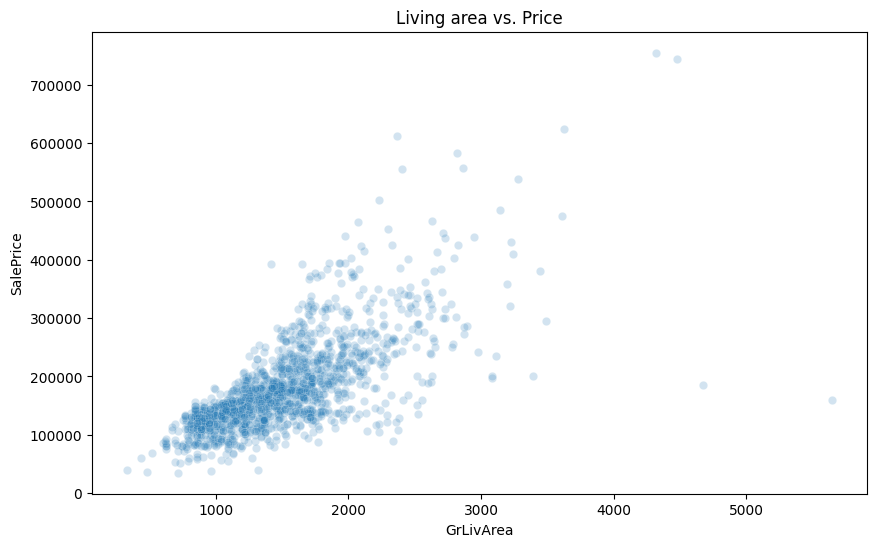

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.2)
plt.title('Living area vs. Price')
plt.show()

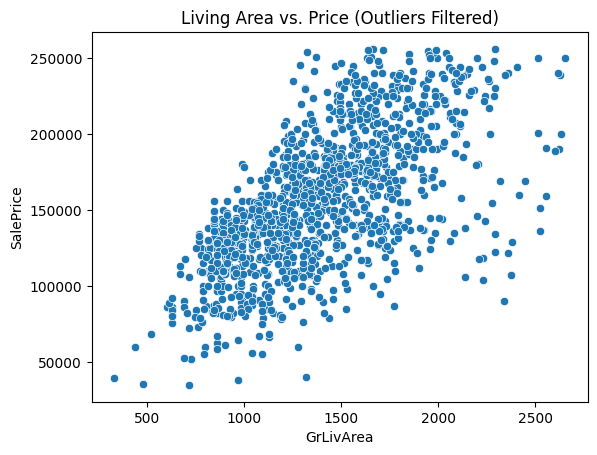

In [53]:
# Identify outliers using IQR method (adjust multiplier as needed)
liv_area_Q1 = LivArea.quantile(0.25)
liv_area_Q3 = LivArea.quantile(0.75)
IQR = liv_area_Q3 - liv_area_Q1
lva_lower_threshold = liv_area_Q1 - 1.5 * IQR
lva_upper_threshold = liv_area_Q3 + 1.5 * IQR

price_q1 = Price.quantile(0.25)
price_q3 = Price.quantile(0.75)
price_iqr = price_q3 - price_q1
price_lower = price_q1 - 1.5 * price_iqr
price_upper = price_q1 + 1.5 * price_iqr
# Filter outliers based on both living area and price
filtered_df = df[(LivArea >= lva_lower_threshold) & (LivArea <= lva_upper_threshold) &
                 (Price >= price_lower) & (Price <= price_upper)]

sns.scatterplot(x='GrLivArea', y='SalePrice', data=filtered_df)
plt.title('Living Area vs. Price (Outliers Filtered)')
plt.show()

Intercept: 24899.74815733818
Slope: 102.48895891672333


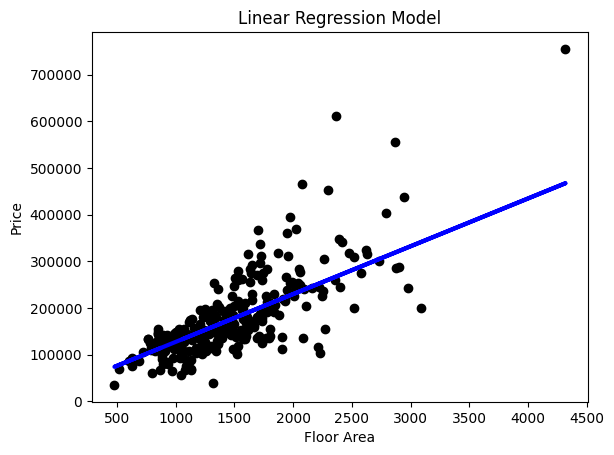

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')

X = df[['GrLivArea']]  # Independent variable (feature)
y = df['SalePrice']     # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the model coefficients
intercept = model.intercept_
slope = model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

# Make predictions on the test set
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.title('Linear Regression Model')
plt.show()

In [7]:
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

R-squared: 0.5542632452871117


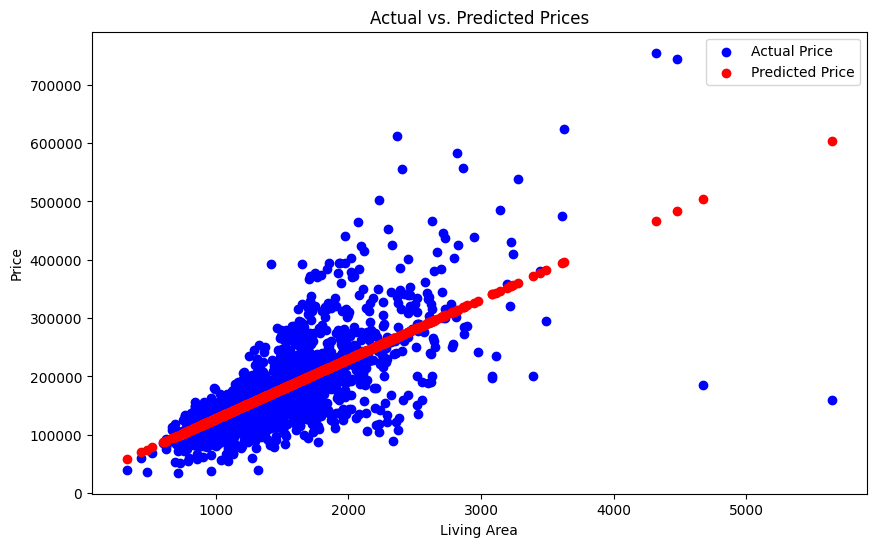

In [11]:
df['Predicted_Price'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'], color='blue', label='Actual Price')
plt.scatter(df['GrLivArea'], df['Predicted_Price'], color='red', label='Predicted Price')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

Mean of residuals: 703.1509843830762
Standard deviation of residuals: 56106.53981411632


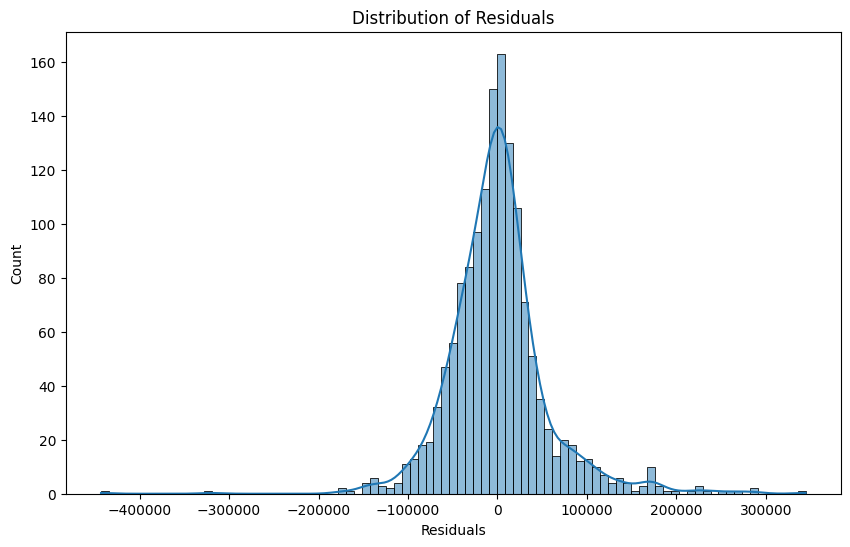

In [14]:
df['Residuals'] = df['SalePrice'] - df['Predicted_Price']

print("Mean of residuals:", df['Residuals'].mean())
print("Standard deviation of residuals:", df['Residuals'].std())

plt.figure(figsize=(10, 6))
sns.histplot(df['Residuals'], kde=True)
plt.title('Distribution of Residuals')
plt.show()

Task02

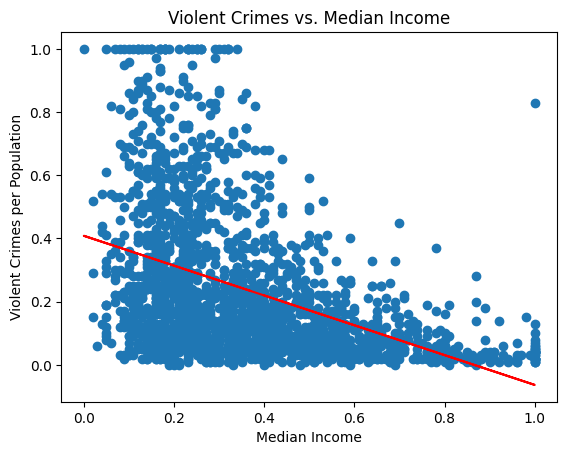

Slope: -0.4720854929583649
Intercept: 0.408460041007753
R-squared: 0.1799631316554945


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_csv('censusCrimeClean.csv')

X = df['medIncome']  # Independent variable
y = df['ViolentCrimesPerPop']  # Dependent variable

# Linear regression model
slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Regression line
modelledDependent = np.polyval([slope, intercept], X)

plt.scatter(X, y)
plt.plot(X, modelledDependent, color='red')
plt.xlabel('Median Income')
plt.ylabel('Violent Crimes per Population')
plt.title('Violent Crimes vs. Median Income')
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)


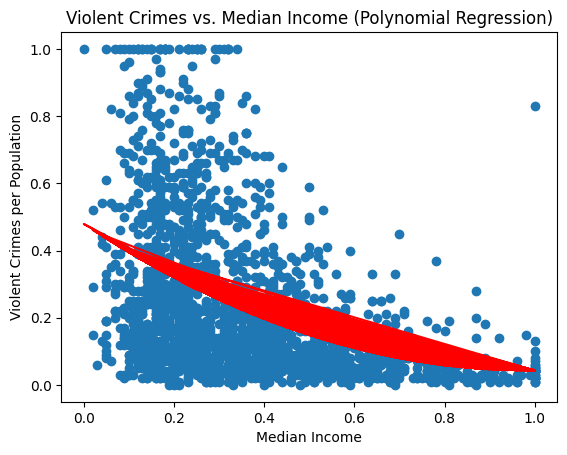

In [17]:
pCoeff = np.polyfit(X, y, 2)
evaluatedCurve = np.polyval(pCoeff, X)

plt.scatter(X, y)
plt.plot(X, evaluatedCurve, color='red')
plt.xlabel('Median Income')
plt.ylabel('Violent Crimes per Population')
plt.title('Violent Crimes vs. Median Income (Polynomial Regression)')
plt.show()

The trend suggests a correlation between median income and violent crime rates where less income indicates more crime.